In [1]:
import pandas as pd
import numpy as np 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

## Data explore

In [3]:
cdmx_venues = pd.read_csv('cdmx_venues.csv') 
cdmx_venues.drop('Unnamed: 0',axis=1, inplace=True)

this is how the dataframe lokks like

In [4]:
cdmx_venues

City          Neighborhood  Neighborhood Latitude  \
0           MIGUEL HIDALGO  LOMAS DE CHAPULTEPEC              19.422841   
1           MIGUEL HIDALGO  LOMAS DE CHAPULTEPEC              19.422841   
2           MIGUEL HIDALGO  LOMAS DE CHAPULTEPEC              19.422841   
3           MIGUEL HIDALGO  LOMAS DE CHAPULTEPEC              19.422841   
4           MIGUEL HIDALGO  LOMAS DE CHAPULTEPEC              19.422841   
...                    ...                   ...                    ...   
32349  VENUSTIANO CARRANZA     JARDIN BALBUENA I              19.421584   
32350  VENUSTIANO CARRANZA     JARDIN BALBUENA I              19.421584   
32351  VENUSTIANO CARRANZA     JARDIN BALBUENA I              19.421584   
32352  VENUSTIANO CARRANZA     JARDIN BALBUENA I              19.421584   
32353  VENUSTIANO CARRANZA     JARDIN BALBUENA I              19.421584   

       Neighborhood Longitude                                Venue  \
0                  -99.215794                       Studio Gourmet   
1                  -99.215794                           Loma Linda   
2                  -99.215794  Cabina Radio Disney 99.3 Grupo Acir   
3                  -99.215794                        Silence Track   
4                  -99.215794                          City Market   
...                       ...                                  ...   
32349              -99.105354                     Buffet Chon Hing   
32350              -99.105354                         Créme brûlée   
32351              -99.105354                               Gino's   
32352              -99.105354                                Kaloc   
32353              -99.105354                                 Vips   

           Venue Category  Venue Latitude  Venue Longitude  
0               Gastropub       19.420263       -99.215545  
1              Steakhouse       19.420156       -99.218127  
2             Music Venue       19.420787       -99.215974  
3        Recording Studio       19.420381       -99.217477  
4            Gourmet Shop       19.418977       -99.214751  
...                   ...             ...              ...  
32349  Chinese Restaurant       19.418560       -99.106787  
32350         Pastry Shop       19.420301       -99.107339  
32351              Bakery       19.417969       -99.103875  
32352  Chinese Restaurant       19.418322       -99.106221  
32353          Restaurant       19.418089       -99.105359  

[32354 rows x 8 columns]

In [5]:

# Uncomment to see the diferent cities
#print('there are {} Diferent "Alcaldias", which are:  {}'.format(len(cdmx_venues.City.unique()), cdmx_venues.City.unique())) 

Top 10 venues in the cdmx

In [6]:
popular_venues = cdmx_venues.groupby(['Venue Category']).count().sort_values('City', ascending=False)
popular_venues = popular_venues.head(10) 
popular_venues

City  Neighborhood  Neighborhood Latitude  \
Venue Category                                                  
Mexican Restaurant  3504          3504                   3504   
Taco Place          3208          3208                   3208   
Coffee Shop         1057          1057                   1057   
Restaurant          1005          1005                   1005   
Bakery               921           921                    921   
Convenience Store    897           897                    897   
Pizza Place          811           811                    811   
Burger Joint         784           784                    784   
Ice Cream Shop       775           775                    775   
Seafood Restaurant   764           764                    764   

                    Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                      
Mexican Restaurant                    3504   3504            3504   
Taco Place                            3208   3208            3208   
Coffee Shop                           1057   1057            1057   
Restaurant                            1005   1005            1005   
Bakery                                 921    921             921   
Convenience Store                      897    897             897   
Pizza Place                            811    811             811   
Burger Joint                           784    784             784   
Ice Cream Shop                         775    775             775   
Seafood Restaurant                     764    764             764   

                    Venue Longitude  
Venue Category                       
Mexican Restaurant             3504  
Taco Place                     3208  
Coffee Shop                    1057  
Restaurant                     1005  
Bakery                          921  
Convenience Store               897  
Pizza Place                     811  
Burger Joint                    784  
Ice Cream Shop                  775  
Seafood Restaurant              764

In [7]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

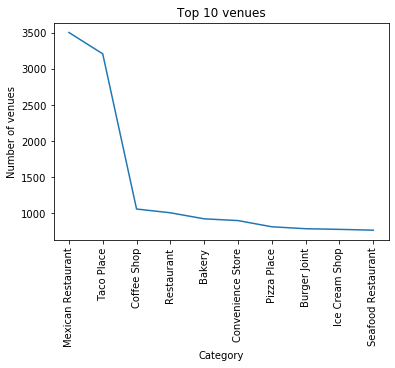

In [8]:
popular_venues.City.plot()
plt.xticks(np.arange(len(popular_venues.City)), popular_venues.index ) #set labels
plt.xticks(rotation='vertical') #rotate labels 
plt.title('Top 10 venues')
plt.ylabel('Number of venues')
plt.xlabel('Category')


plt.show()

In [9]:
least_venues = cdmx_venues.groupby(['Venue Category']).count()
least_venues.loc[least_venues['City'] == 1, :]

City  Neighborhood  Neighborhood Latitude  \
Venue Category                                                        
Airport Service              1             1                      1   
Astrologer                   1             1                      1   
Bathing Area                 1             1                      1   
Boarding House               1             1                      1   
Botanero                     1             1                      1   
Bridge                       1             1                      1   
Cave                         1             1                      1   
Chiropractor                 1             1                      1   
Circus                       1             1                      1   
College Auditorium           1             1                      1   
College Baseball Diamond     1             1                      1   
College Bookstore            1             1                      1   
College Classroom            1             1                      1   
College Football Field       1             1                      1   
Comic Shop                   1             1                      1   
Convention Center            1             1                      1   
Country Dance Club           1             1                      1   
Cruise                       1             1                      1   
Event Service                1             1                      1   
Gluten-free Restaurant       1             1                      1   
Harbor / Marina              1             1                      1   
Hunting Supply               1             1                      1   
Irish Pub                    1             1                      1   
Jewish Restaurant            1             1                      1   
Knitting Store               1             1                      1   
Library                      1             1                      1   
Light Rail Station           1             1                      1   
Locksmith                    1             1                      1   
Luggage Store                1             1                      1   
Medical Lab                  1             1                      1   
Medical Supply Store         1             1                      1   
Monument / Landmark          1             1                      1   
Non-Profit                   1             1                      1   
North Indian Restaurant      1             1                      1   
Paella Restaurant            1             1                      1   
Palace                       1             1                      1   
Pawn Shop                    1             1                      1   
Portuguese Restaurant        1             1                      1   
RV Park                      1             1                      1   
Ramen Restaurant             1             1                      1   
Recycling Facility           1             1                      1   
Roof Deck                    1             1                      1   
Scandinavian Restaurant      1             1                      1   
Shabu-Shabu Restaurant       1             1                      1   
Shopping Plaza               1             1                      1   
Smoothie Shop                1             1                      1   
Souvenir Shop                1             1                      1   
State / Provincial Park      1             1                      1   
Swiss Restaurant             1             1                      1   
Taxi Stand                   1             1                      1   
Toll Plaza                   1             1                      1   
Town                         1             1                      1   
Train Station                1             1                      1   
Tunnel                       1             1                      1   
Ukrainian Restaurant         1             1      

In [10]:
#if you want to know more about the category
cdmx_venues[cdmx_venues['Venue Category']=='Ukrainian Restaurant']

City Neighborhood  Neighborhood Latitude  \
31987  MIGUEL HIDALGO   ANAHUAC II              19.441216   

       Neighborhood Longitude      Venue        Venue Category  \
31987              -99.177507  Roksolana  Ukrainian Restaurant   

       Venue Latitude  Venue Longitude  
31987       19.437764       -99.177006

Number of venues per Alcaldia (city)

In [11]:
cdmx_venues.groupby('City').count().sort_values('Venue', ascending=False)

Neighborhood  Neighborhood Latitude  \
City                                                          
COYOACAN                        4309                   4309   
ALVARO OBREGON                  3483                   3483   
BENITO JUAREZ                   3199                   3199   
IZTAPALAPA                      2990                   2990   
GUSTAVO A. MADERO               2969                   2969   
TLALPAN                         2903                   2903   
CUAUHTEMOC                      2599                   2599   
MIGUEL HIDALGO                  2593                   2593   
AZCAPOTZALCO                    2287                   2287   
VENUSTIANO CARRANZA             1676                   1676   
IZTACALCO                       1000                   1000   
XOCHIMILCO                       882                    882   
LA MAGDALENA CONTRERAS           693                    693   
CUAJIMALPA DE MORELOS            433                    433   
TLAHUAC                          291                    291   
MILPA ALTA                        47                     47   

                        Neighborhood Longitude  Venue  Venue Category  \
City                                                                    
COYOACAN                                  4309   4309            4309   
ALVARO OBREGON                            3483   3483            3483   
BENITO JUAREZ                             3199   3199            3199   
IZTAPALAPA                                2990   2990            2990   
GUSTAVO A. MADERO                         2969   2969            2969   
TLALPAN                                   2903   2903            2903   
CUAUHTEMOC                                2599   2599            2599   
MIGUEL HIDALGO                            2593   2593            2593   
AZCAPOTZALCO                              2287   2287            2287   
VENUSTIANO CARRANZA                       1676   1676            1676   
IZTACALCO                                 1000   1000            1000   
XOCHIMILCO                                 882    882             882   
LA MAGDALENA CONTRERAS                     693    693             693   
CUAJIMALPA DE MORELOS                      433    433             433   
TLAHUAC                                    291    291             291   
MILPA ALTA                                  47     47              47   

                        Venue Latitude  Venue Longitude  
City                                                     
COYOACAN                          4309             4309  
ALVARO OBREGON                    3483             3483  
BENITO JUAREZ                     3199             3199  
IZTAPALAPA                        2990             2990  
GUSTAVO A. MADERO                 2969             2969  
TLALPAN                           2903             2903  
CUAUHTEMOC                        2599             2599  
MIGUEL HIDALGO                    2593             2593  
AZCAPOTZALCO                      2287             2287  
VENUSTIANO CARRANZA               1676             1676  
IZTACALCO                         1000             1000  
XOCHIMILCO                         882              882  
LA MAGDALENA CONTRERAS             693              693  
CUAJIMALPA DE MORELOS              433              433  
TLAHUAC                            291              291  
MILPA ALTA                          47               47

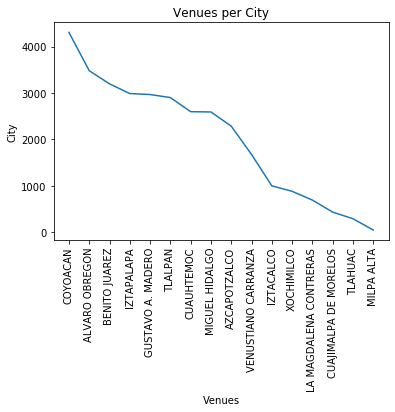

In [12]:
group = cdmx_venues.groupby('City').count().sort_values('Venue', ascending=False)
group.Venue.plot()
plt.xticks(np.arange(len(group.Venue)), group.index ) #set labels
plt.xticks(rotation='vertical') #rotate labels 
plt.title('Venues per City')
plt.ylabel('City')
plt.xlabel('Venues')

plt.show()

In [13]:
print ('there are {} unique venues'.format(len( cdmx_venues['Venue Category'].unique())) )

there are 463 unique venues


In [14]:
print ('there are {} Neighborhood'.format(len(cdmx_venues.groupby('Neighborhood Latitude').count())) )


there are 1759 Neighborhood


## Data Analyze

First, we are going to put all categories as columns and represent the category of each venue with '1'. the remain categories en that venue will be  '0'

In [15]:
cdmx_onehot = pd.get_dummies(cdmx_venues[['Venue Category']], prefix="", prefix_sep="")
cdmx_onehot

ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0        0                  0               0                   0   
1        0                  0               0                   0   
2        0                  0               0                   0   
3        0                  0               0                   0   
4        0                  0               0                   0   
...    ...                ...             ...                 ...   
32349    0                  0               0                   0   
32350    0                  0               0                   0   
32351    0                  0               0                   0   
32352    0                  0               0                   0   
32353    0                  0               0                   0   

       African Restaurant  Airport  Airport Service  American Restaurant  \
0                       0        0                0                    0   
1                       0        0                0                    0   
2                       0        0                0                    0   
3                       0        0                0                    0   
4                       0        0                0                    0   
...                   ...      ...              ...                  ...   
32349                   0        0                0                    0   
32350                   0        0                0                    0   
32351                   0        0                0                    0   
32352                   0        0                0                    0   
32353                   0        0                0                    0   

       Antique Shop  Arcade  ...  Whisky Bar  Wine Bar  Wine Shop  Winery  \
0                 0       0  ...           0         0          0       0   
1                 0       0  ...           0         0          0       0   
2                 0       0  ...           0         0          0       0   
3                 0       0  ...           0         0          0       0   
4                 0       0  ...           0         0          0       0   
...             ...     ...  ...         ...       ...        ...     ...   
32349             0       0  ...           0         0          0       0   
32350             0       0  ...           0         0          0       0   
32351             0       0  ...           0         0          0       0   
32352             0       0  ...           0         0          0       0   
32353             0       0  ...           0         0          0       0   

       Wings Joint  Women's Store  Yoga Studio  Yucatecan Restaurant  Zoo  \
0                0              0            0                     0    0   
1                0              0            0                     0    0   
2                0              0            0                     0    0   
3                0              0            0                     0    0   
4                0              0            0                     0    0   
...            ...            ...          ...                   ...  ...   
32349            0              0            0                     0    0   
32350            0              0            0                     0    0   
32351            0              0            0                     0    0   
32352            0              0            0                     0    0   
32353            0              0            0                     0    0   

       Zoo Exhibit  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
32349            0  
32350            0  
32351            0  
32352            0  
32353            0  

[32354 rows x 463 columns]

Note we got the 456 unique venues (in columns) and the 26721 rows

The next step is to get the mean value per Neigborhood

In [16]:
# add neighborhood column back to dataframe
cdmx_onehot['Nbh'] = cdmx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cdmx_onehot.columns[-1]] + list(cdmx_onehot.columns[:-1])
cdmx_onehot = cdmx_onehot[fixed_columns]

In [17]:
cdmx_onehot['Neighborhood Longitude'] = cdmx_venues['Neighborhood Longitude'] 

# move city column to the first column
fixed_columns = [cdmx_onehot.columns[-1]] + list(cdmx_onehot.columns[:-1])
cdmx_onehot = cdmx_onehot[fixed_columns]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
cdmx_onehot['Neighborhood Latitude'] = cdmx_venues['Neighborhood Latitude'] 

# move city column to the first column
fixed_columns = [cdmx_onehot.columns[-1]] + list(cdmx_onehot.columns[:-1])
cdmx_onehot = cdmx_onehot[fixed_columns]
cdmx_onehot.head(6)

Neighborhood Latitude  Neighborhood Longitude                   Nbh  ATM  \
0              19.422841              -99.215794  LOMAS DE CHAPULTEPEC    0   
1              19.422841              -99.215794  LOMAS DE CHAPULTEPEC    0   
2              19.422841              -99.215794  LOMAS DE CHAPULTEPEC    0   
3              19.422841              -99.215794  LOMAS DE CHAPULTEPEC    0   
4              19.422841              -99.215794  LOMAS DE CHAPULTEPEC    0   
5              19.422841              -99.215794  LOMAS DE CHAPULTEPEC    0   

   Accessories Store  Adult Boutique  Advertising Agency  African Restaurant  \
0                  0               0                   0                   0   
1                  0               0                   0                   0   
2                  0               0                   0                   0   
3                  0               0                   0                   0   
4                  0               0                   0                   0   
5                  0               0                   0                   0   

   Airport  Airport Service  ...  Whisky Bar  Wine Bar  Wine Shop  Winery  \
0        0                0  ...           0         0          0       0   
1        0                0  ...           0         0          0       0   
2        0                0  ...           0         0          0       0   
3        0                0  ...           0         0          0       0   
4        0                0  ...           0         0          0       0   
5        0                0  ...           0         0          0       0   

   Wings Joint  Women's Store  Yoga Studio  Yucatecan Restaurant  Zoo  \
0            0              0            0                     0    0   
1            0              0            0                     0    0   
2            0              0            0                     0    0   
3            0              0            0                     0    0   
4            0              0            0                     0    0   
5            0              0            0                     0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  

[6 rows x 466 columns]

In [19]:
cdmx_gruped = cdmx_onehot.groupby(['Neighborhood Latitude','Neighborhood Longitude','Nbh']).mean().reset_index()
cdmx_gruped 

Neighborhood Latitude  Neighborhood Longitude  \
0                 19.133472              -99.173887   
1                 19.173721              -98.999481   
2                 19.175250              -99.030783   
3                 19.184543              -99.147997   
4                 19.187136              -99.143697   
...                     ...                     ...   
1754              19.568715              -99.125686   
1755              19.569110              -99.129311   
1756              19.570902              -99.137958   
1757              19.573383              -99.128882   
1758              19.574838              -99.134737   

                                Nbh  ATM  Accessories Store  Adult Boutique  \
0           PARRES EL GUARDA (PBLO)  0.0                0.0             0.0   
1       SANTA ANA TLACOTENCO (PBLO)  0.0                0.0             0.0   
2     SAN LORENZO TLACOYUCAN (PBLO)  0.0                0.0             0.0   
3              AYOCATITLA,  ASUNCIN  0.0                0.0             0.0   
4                         XAXALIPAC  0.0                0.0             0.0   
...                             ...  ...                ...             ...   
1754                  LA FORESTAL 2  0.0                0.0             0.0   
1755                  LA FORESTAL 3  0.0                0.0             0.0   
1756             LOMAS DE CUAUTEPEC  0.0                0.0             0.0   
1757                VERONICA CASTRO  0.0                0.0             0.0   
1758                      MALACATES  0.0                0.0             0.0   

      Advertising Agency  African Restaurant  Airport  Airport Service  ...  \
0                    0.0                 0.0      0.0              0.0  ...   
1                    0.0                 0.0      0.0              0.0  ...   
2                    0.0                 0.0      0.0              0.0  ...   
3                    0.0                 0.0      0.0              0.0  ...   
4                    0.0                 0.0      0.0              0.0  ...   
...                  ...                 ...      ...              ...  ...   
1754                 0.0                 0.0      0.0              0.0  ...   
1755                 0.0                 0.0      0.0              0.0  ...   
1756                 0.0                 0.0      0.0              0.0  ...   
1757                 0.0                 0.0      0.0              0.0  ...   
1758                 0.0                 0.0      0.0              0.0  ...   

      Whisky Bar  Wine Bar  Wine Shop  Winery  Wings Joint  Women's Store  \
0            0.0       0.0        0.0     0.0          0.0            0.0   
1            0.0       0.0        0.0     0.0          0.0            0.0   
2            0.0       0.0        0.0     0.0          0.0            0.0   
3            0.0       0.0        0.0     0.0          0.0            0.0   
4            0.0       0.0        0.0     0.0          0.0            0.0   
...          ...       ...        ...     ...          ...            ...   
1754         0.0       0.0        0.0     0.0          0.0            0.0   
1755         0.0       0.0        0.0     0.0          0.0            0.0   
1756         0.0       0.0        0.0     0.0          0.0            0.0   
1757         0.0       0.0        0.0     0.0          0.0            0.0   
1758         0.0       0.0        0.0     0.0          0.0            0.0   

      Yoga Studio  Yucatecan Restaurant  Zoo  Zoo Exhibit  
0             0.0                   0.0  0.0          0.0  
1             0.0                   0.0  0.0          0.0  
2             0.0                   0.0  0.0          0.0  
3             0.0                   0.0  0.0          0.0  
4             0.0                   0.0  0.0          0.0  
...           ...                   ...  ...          ...  
1754          0.0                   0.0  0.0          0.0  
1755          0.0                   0.0  0

In [20]:
len(cdmx_gruped['Neighborhood Latitude'].unique())

1759

get the venues frequency in a neighborhood,  this time will be used the 1612 row

In [21]:
cdmx_gruped[cdmx_gruped['Nbh']=='LINDAVISTA I']

Neighborhood Latitude  Neighborhood Longitude           Nbh  ATM  \
1612              19.489945              -99.131671  LINDAVISTA I  0.0   

      Accessories Store  Adult Boutique  Advertising Agency  \
1612           0.011364             0.0                 0.0   

      African Restaurant  Airport  Airport Service  ...  Whisky Bar  Wine Bar  \
1612                 0.0      0.0              0.0  ...         0.0       0.0   

      Wine Shop  Winery  Wings Joint  Women's Store  Yoga Studio  \
1612        0.0     0.0          0.0            0.0          0.0   

      Yucatecan Restaurant  Zoo  Zoo Exhibit  
1612                   0.0  0.0          0.0  

[1 rows x 466 columns]

In [22]:
N = cdmx_gruped.loc[[1612], :].T.reset_index()
#N = cdmx_gruped[cdmx_gruped['Nbh']=='LINDAVISTA I'].T.reset_index()  #Select the neighborhood and transpose it
N.columns = ['venue','freq']  #rename columns
N = N.drop([0,1,2], axis=0)    #the first row are the old column names
N['freq'] = N['freq'].astype(float) #correct the type
Nsort=N.sort_values('freq', ascending=False).reset_index().drop('index', axis=1) #Sort values by frequency 

Get the top 10 venues of  the selected neighborhood

In [23]:
Nsort.head(10)

venue      freq
0      Ice Cream Shop  0.079545
1          Taco Place  0.068182
2       Shopping Mall  0.045455
3            Creperie  0.045455
4              Bakery  0.045455
5  Mexican Restaurant  0.045455
6      Cosmetics Shop  0.045455
7  Seafood Restaurant  0.034091
8         Coffee Shop  0.034091
9  Tex-Mex Restaurant  0.022727

create en empty dataframe and save the values of the last dataframe

In [24]:
R=Nsort.loc[0:10,'venue'].T
C=0
while Nsort.loc[C,'freq'] > 0:
        C= C+1
        
neighborhoods_venues_sorted0 = pd.DataFrame(columns=['Neighborhood','City'])
neighborhoods_venues_sorted0 = neighborhoods_venues_sorted0.append(R[0:C], ignore_index=True)
neighborhoods_venues_sorted0

Neighborhood City               0           1              2         3  \
0          NaN  NaN  Ice Cream Shop  Taco Place  Shopping Mall  Creperie   

        4                   5               6                   7  \
0  Bakery  Mexican Restaurant  Cosmetics Shop  Seafood Restaurant   

             8                   9           10  
0  Coffee Shop  Tex-Mex Restaurant  Pizza Place

Finally set the name

In [25]:
neighborhoods_venues_sorted0.loc[0,'Neighborhood'] = 'LINDAVISTA I'
neighborhoods_venues_sorted0.loc[0, 'City']= 'GUSTAVO A. MADERO'
neighborhoods_venues_sorted0

Neighborhood               City               0           1              2  \
0  LINDAVISTA I  GUSTAVO A. MADERO  Ice Cream Shop  Taco Place  Shopping Mall   

          3       4                   5               6                   7  \
0  Creperie  Bakery  Mexican Restaurant  Cosmetics Shop  Seafood Restaurant   

             8                   9           10  
0  Coffee Shop  Tex-Mex Restaurant  Pizza Place

Lets repeat the same process for all the neighborhood

In [26]:
neighborhoods_venues_sorted = pd.DataFrame(columns=['Neighborhood','Lat','Lon']) #empty dataframe with just one column
Top=10

for i in list(range(len(cdmx_gruped))):
    
    N = cdmx_gruped.loc[i,:].T.reset_index()  #Select the neighborhood and transpose it
    N.columns = ['venue','freq']  #rename columns
    N = N.drop([0,1,2], axis=0)    #the first row are the old column names
    N['freq'] = N['freq'].astype(float) #correct the type
    Nsort=N.sort_values('freq', ascending=False).reset_index().drop('index', axis=1)
    
    Lat = cdmx_gruped.loc[i, 'Neighborhood Latitude']
    Lon = cdmx_gruped.loc[i, 'Neighborhood Longitude']
    n = cdmx_gruped.loc[i, 'Nbh']
    
    R=Nsort.loc[0:Top,'venue'].T #get the ordered venues 
    C=0
    while Nsort.loc[C,'freq'] > 0:
            C= C+1
    neighborhoods_venues_sorted = neighborhoods_venues_sorted.append(R[0:C], ignore_index=True) 
    neighborhoods_venues_sorted.loc[i,'Neighborhood'] = n #set the neighborhood Name the 'Neighborhood' column
    neighborhoods_venues_sorted.loc[i,'Lat'] = Lat
    neighborhoods_venues_sorted.loc[i,'Lon'] = Lon
    
   

In [27]:
neighborhoods_venues_sorted.head()

Neighborhood      Lat      Lon                        0  \
0        PARRES EL GUARDA (PBLO)  19.1335 -99.1739  New American Restaurant   
1    SANTA ANA TLACOTENCO (PBLO)  19.1737 -98.9995            Historic Site   
2  SAN LORENZO TLACOYUCAN (PBLO)  19.1752 -99.0308       Seafood Restaurant   
3           AYOCATITLA,  ASUNCIN  19.1845  -99.148   Argentinian Restaurant   
4                      XAXALIPAC  19.1871 -99.1437      Indie Movie Theater   

              1          2    3    4    5    6    7    8    9   10  
0    Food Stand  BBQ Joint  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  Soccer Field        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2           NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3           NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4           NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

## Cluster Neighborhoods

In [28]:
cdmx_clustering = cdmx_gruped.drop(['Neighborhood Latitude','Neighborhood Longitude','Nbh'], axis=1)
kmeans = KMeans( n_clusters=7, init='k-means++', n_init=25, max_iter=400, random_state=0).fit(cdmx_clustering)
kmeans.labels_[0:15]

array([0, 0, 0, 0, 0, 4, 0, 2, 1, 4, 0, 4, 1, 2, 2], dtype=int32)

In [29]:
#this file was downloaded from datos.cdmx.gob.mx and was cleaned in previous notebook
cdmx_merged= pd.read_csv('cdmx_locations.csv')
cdmx_merged.drop('Unnamed: 0', axis=1, inplace=True)
cdmx_merged.head()

COLONIA        ALCALDIA        Lat  \
0                     LOMAS DE CHAPULTEPEC  MIGUEL HIDALGO  19.422841   
1  LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC)  MIGUEL HIDALGO  19.410616   
2                     DEL BOSQUE (POLANCO)  MIGUEL HIDALGO  19.434219   
3               PEDREGAL DE SANTA URSULA I        COYOACAN  19.314862   
4                                 AJUSCO I        COYOACAN  19.324571   

         Lon  
0 -99.215794  
1 -99.226249  
2 -99.209404  
3 -99.147795  
4 -99.156160

add clustering labels

In [30]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

Cluster Labels                   Neighborhood      Lat      Lon  \
0               0        PARRES EL GUARDA (PBLO)  19.1335 -99.1739   
1               0    SANTA ANA TLACOTENCO (PBLO)  19.1737 -98.9995   
2               0  SAN LORENZO TLACOYUCAN (PBLO)  19.1752 -99.0308   
3               0           AYOCATITLA,  ASUNCIN  19.1845  -99.148   
4               0                      XAXALIPAC  19.1871 -99.1437   

                         0             1          2    3    4    5    6    7  \
0  New American Restaurant    Food Stand  BBQ Joint  NaN  NaN  NaN  NaN  NaN   
1            Historic Site  Soccer Field        NaN  NaN  NaN  NaN  NaN  NaN   
2       Seafood Restaurant           NaN        NaN  NaN  NaN  NaN  NaN  NaN   
3   Argentinian Restaurant           NaN        NaN  NaN  NaN  NaN  NaN  NaN   
4      Indie Movie Theater           NaN        NaN  NaN  NaN  NaN  NaN  NaN   

     8    9   10  
0  NaN  NaN  NaN  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN  
4  NaN  NaN  NaN

In [31]:
#Join the the dataframes in order to get the city (Alcaldia) column
cdmx_merged = pd.merge(neighborhoods_venues_sorted, cdmx_merged,  how='left', left_on=['Lat','Lon','Neighborhood'], right_on = ['Lat','Lon', 'COLONIA'])
cdmx_merged.drop('COLONIA', axis=1, inplace=True)
#set the columns in the right order 
fixed=[cdmx_merged.columns[0]]+ [cdmx_merged.columns[-1]] + list(cdmx_merged.columns[1:14])
cdmx_merged = cdmx_merged[fixed]
cdmx_merged

Cluster Labels           ALCALDIA                   Neighborhood  \
0                  0            TLALPAN        PARRES EL GUARDA (PBLO)   
1                  0         MILPA ALTA    SANTA ANA TLACOTENCO (PBLO)   
2                  0         MILPA ALTA  SAN LORENZO TLACOYUCAN (PBLO)   
3                  0            TLALPAN           AYOCATITLA,  ASUNCIN   
4                  0            TLALPAN                      XAXALIPAC   
...              ...                ...                            ...   
1754               0  GUSTAVO A. MADERO                  LA FORESTAL 2   
1755               0  GUSTAVO A. MADERO                  LA FORESTAL 3   
1756               2  GUSTAVO A. MADERO             LOMAS DE CUAUTEPEC   
1757               0  GUSTAVO A. MADERO                VERONICA CASTRO   
1758               2  GUSTAVO A. MADERO                      MALACATES   

          Lat      Lon                        0                   1  \
0     19.1335 -99.1739  New American Restaurant          Food Stand   
1     19.1737 -98.9995            Historic Site        Soccer Field   
2     19.1752 -99.0308       Seafood Restaurant                 NaN   
3     19.1845  -99.148   Argentinian Restaurant                 NaN   
4     19.1871 -99.1437      Indie Movie Theater                 NaN   
...       ...      ...                      ...                 ...   
1754  19.5687 -99.1257                Rest Area                 NaN   
1755  19.5691 -99.1293                Rest Area   Convenience Store   
1756  19.5709  -99.138       Mexican Restaurant      Breakfast Spot   
1757  19.5734 -99.1289                      Bar         Bus Station   
1758  19.5748 -99.1347              Bus Station  Mexican Restaurant   

               2    3    4    5    6    7    8    9  
0      BBQ Joint  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...          ...  ...  ...  ...  ...  ...  ...  ...  
1754         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1755         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1756  Public Art  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1757         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1758  Campground  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1759 rows x 15 columns]

In [32]:
#cdmx_merged.to_csv('cdmx_cluster_venues.csv')
#cdmx_merged=pd.read_csv('cdmx_cluster_venues.csv')

In [33]:
# create map
map_clusters = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)

# set color scheme for the clusters
colors = ['#B2124C','#3931EB','#0548E1','#00BFFF','#7FFFD4','#CFB53B','#E67E22']

# add markers to the map

for lat, lon, poi, cluster in zip(cdmx_merged['Lat'], cdmx_merged['Lon'], cdmx_merged['Neighborhood'], cdmx_merged['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)

In [34]:
map_clusters

In [35]:
from numpy import random

In [36]:
s=15

In [53]:
cluster0=cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 0, cdmx_merged.columns[[1,2] + list(range(5,15)) ]].reset_index()
 # RED
cluster0.loc[  list(random.randint(cluster0.shape[0], size=(s)))  ,:]

index                ALCALDIA                            Neighborhood  \
545   1299          MIGUEL HIDALGO               POLANCO REFORMA (POLANCO)   
540   1293     VENUSTIANO CARRANZA                                CENTRO I   
5        6                 TLALPAN                LA LIBERTAD - IXTLAHUACA   
339    763          ALVARO OBREGON                                DOS RIOS   
53     134                 TLALPAN                    MIRADOR 2A y 3A SECC   
421    973           BENITO JUAREZ                                SAN JUAN   
231    523              IZTAPALAPA                         12 DE DICIEMBRE   
213    481              IZTAPALAPA                      GRANJAS ESTRELLA I   
328    729                COYOACAN                              DEL CARMEN   
241    551  LA MAGDALENA CONTRERAS         INDEPENDENCIA SAN RAMON (U HAB)   
118    276                 TLALPAN  NUEVA ORIENTAL COAPA-EX HACIENDA COAPA   
57     151              XOCHIMILCO              SANTA MARIA TEPEPAN (PBLO)   
403    925              IZTAPALAPA                  CHINAMPAC DE JUAREZ II   
334    747                COYOACAN                    SAN DIEGO CHURUBUSCO   
33      71              XOCHIMILCO                       LOS CERRILLOS III   

                       0                   1                   2  \
545   Mexican Restaurant         Coffee Shop          Restaurant   
540       Clothing Store         Bus Station   Convenience Store   
5    Indie Movie Theater                 NaN                 NaN   
339          Bus Station   Convenience Store           BBQ Joint   
53          Burger Joint              Market           BBQ Joint   
421          Coffee Shop          Restaurant          Taco Place   
231   Seafood Restaurant         Zoo Exhibit            Pharmacy   
213    Electronics Store            Pharmacy    Department Store   
328       Ice Cream Shop  Mexican Restaurant         Coffee Shop   
241          Coffee Shop    Toy / Game Store  Mexican Restaurant   
118         Burger Joint                 Gym          Restaurant   
57           Snack Place           BBQ Joint                 Bar   
403              Brewery           BBQ Joint              Lounge   
334          Coffee Shop      History Museum        Dance Studio   
33          Concert Hall    Football Stadium   Convenience Store   

                         3                       4                    5  \
545         Clothing Store  Argentinian Restaurant                Hotel   
540     Mexican Restaurant             Tailor Shop  Arts & Crafts Store   
5                      NaN                     NaN                  NaN   
339             Playground           Garden Center          Coffee Shop   
53                     NaN                     NaN                  NaN   
421  Venezuelan Restaurant                   Hotel               Bakery   
231            Flea Market    Fast Food Restaurant         Soccer Field   
213                    NaN                     NaN                  NaN   
328                   Café                  Bakery    French Restaurant   
241   Gym / Fitness Center           Shopping Mall                  Gym   
118            Pizza Place             Supermarket       Adult Boutique   
57                     Gym   General Entertainment           Taco Place   
403                    NaN                     NaN                  NaN   
334                  Plaza            Burger Joint                  Spa   
33      Athletics & Sports                     NaN                  NaN   

                     6                        7                     8  \
545        Pizza Place     Brazilian Restaurant             Bookstore   
540         Food Truck                     Lake                   Gym   
5                  NaN                      NaN                   NaN   
339                NaN                      NaN                   NaN   
53                 NaN                      NaN                   NaN   
421  Health Food Store  Heal

In [38]:
map_clusters0 = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)
cluster0 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 0]

for lat, lon, poi, cluster in zip(cluster0['Lat'], cluster0['Lon'], cluster0['Neighborhood'], cluster0['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#B2124C',
        fill=True,
        fill_color='#B2124C',
        fill_opacity=0.7).add_to(map_clusters0)
    
map_clusters0

In [39]:
#PURPLE
cluster1 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 1, cdmx_merged.columns[[1,2] + list(range(5,15)) ]].reset_index()
cluster1.loc[  list(random.randint(cluster1.shape[0], size=(s)))  ,:]

index             ALCALDIA                              Neighborhood  \
196    622             COYOACAN                      SANTA MARTHA DEL SUR   
333   1085            IZTACALCO                                INPI PICOS   
228    737       ALVARO OBREGON                                  TLACOPAC   
104    376             COYOACAN              PEDREGAL DE SANTA URSULA III   
564   1652         AZCAPOTZALCO              CRUZ ROJA TEPANTONGO (U HAB)   
161    528             COYOACAN        INFONAVIT CULHUACAN ZONA 2 (U HAB)   
7       49           XOCHIMILCO               SAN LUCAS XOCHIMANCA (PBLO)   
5       45           XOCHIMILCO                        SAN JOSE ZACATEPEC   
312   1032       ALVARO OBREGON           LOMAS DE BECERRA ARVIDE (U HAB)   
90     308              TLALPAN   EMILIO PORTES GIL PEMEX PICACHO (U HAB)   
565   1653         AZCAPOTZALCO  SAN PABLO 396-CONJ HAB SAN PABLO (U HAB)   
397   1220  VENUSTIANO CARRANZA                       IGNACIO ZARAGOZA II   
422   1305  VENUSTIANO CARRANZA                      PENITENCIARIA (AMPL)   
215    709           IZTAPALAPA                     STA ISABEL INDUSTRIAL   
322   1062        BENITO JUAREZ                NIOS HEROES DE CHAPULTEPEC   

                      0                       1                     2  \
196  Mexican Restaurant              Taco Place            Restaurant   
333          Taco Place              Restaurant            Food Truck   
228      Ice Cream Shop  Furniture / Home Store                Bakery   
104  Mexican Restaurant      Seafood Restaurant        Ice Cream Shop   
564          Taco Place          Baseball Field  Fast Food Restaurant   
161          Taco Place      Mexican Restaurant            Food Truck   
7            Taco Place               Waterfall    Mexican Restaurant   
5            Taco Place             Snack Place            Food Truck   
312  Mexican Restaurant              Food Truck            Taco Place   
90           Taco Place               Pet Store                  Café   
565          Taco Place                    Pool  Fast Food Restaurant   
397          Taco Place      Mexican Restaurant          Burger Joint   
422          Taco Place      Mexican Restaurant            Restaurant   
215          Shoe Store              Taco Place                   ATM   
322  Mexican Restaurant              Taco Place          Burger Joint   

                      3                   4                        5  \
196        Burger Joint         Coffee Shop                 Pharmacy   
333           Speakeasy          Playground                BBQ Joint   
228          Taco Place  Spanish Restaurant                      NaN   
104          Taco Place                Café                     Park   
564   Convenience Store                Pool       Athletics & Sports   
161              Market  Seafood Restaurant                     Park   
7          Liquor Store        Soccer Field           Tennis Stadium   
5    Mexican Restaurant          Restaurant                   Lounge   
312                Park                Farm               Playground   
90          Supermarket         Shoe Repair                 Pharmacy   
565   Convenience Store       Track Stadium       Seafood Restaurant   
397                 Gym                Park  Scandinavian Restaurant   
422              Bakery                Park                BBQ Joint   
215         Auto Garage      Lingerie Store       Mexican Restaurant   
322           BBQ Joint  Seafood Restaurant           Ice Cream Shop   

                        6                   7                              8  \
196     Convenience Store      Ice Cream Shop               Asian Restaurant   
333    Seafood Restaurant         Bus Station               Sushi Restaurant   
228                   NaN                 NaN                            NaN   
104              Creperie         Beer Garden                       Pharmacy   
564     Food & Drink Shop       Memorial Site     

In [40]:
# create map
map_clusters1 = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)
cluster1 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 1]

for lat, lon, poi, cluster in zip(cluster1['Lat'], cluster1['Lon'], cluster1['Neighborhood'], cluster1['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#3931EB',
        fill=True,
        fill_color='#3931EB ',
        fill_opacity=0.7).add_to(map_clusters1)
    
map_clusters1


In [41]:
#BLUE 
cluster2 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 2, cdmx_merged.columns[[1,2] + list(range(5,15)) ]].reset_index()
cluster2.loc[  list(random.randint(cluster2.shape[0], size=(s)))  ,:]

index             ALCALDIA                                  Neighborhood  \
2       14           MILPA ALTA                SAN BARTOLOME XICOMULCO (PBLO)   
83     725           IZTAPALAPA                             GRANJAS ESMERALDA   
83     725           IZTAPALAPA                             GRANJAS ESMERALDA   
187   1477    GUSTAVO A. MADERO  EJIDOS SAN JUAN DE ARAGON 1A SECCION (U HAB)   
33     194              TLAHUAC                 VILLA CENTROAMERICANA (U HAB)   
245   1732    GUSTAVO A. MADERO                               VALLE DE MADERO   
200   1518    GUSTAVO A. MADERO                                     TLACAMACA   
170   1399    GUSTAVO A. MADERO                            EX-ESCUELA DE TIRO   
3       19              TLALPAN                                    TEZONTITLA   
169   1396           CUAUHTEMOC                       SANTA MARIA LA RIBERA I   
32     193           XOCHIMILCO                          SAN BARTOLO EL CHICO   
72     593           IZTAPALAPA                   SAN JUAN 2A AMPLIACIN (PJE)   
113    979       ALVARO OBREGON                                     LA HUERTA   
83     725           IZTAPALAPA                             GRANJAS ESMERALDA   
155   1334  VENUSTIANO CARRANZA                    VENUSTIANO CARRANZA (AMPL)   

                      0                  1                   2  \
2    Mexican Restaurant             Market        Soccer Field   
83   Mexican Restaurant         Taco Place         Snack Place   
83   Mexican Restaurant         Taco Place         Snack Place   
187  Mexican Restaurant             Bakery          Steakhouse   
33   Mexican Restaurant               Café                Park   
245  Mexican Restaurant      Grocery Store          Taco Place   
200  Mexican Restaurant        Coffee Shop       Shopping Mall   
170  Mexican Restaurant       Burger Joint               Diner   
3    Mexican Restaurant  Convenience Store  Seafood Restaurant   
169  Mexican Restaurant             Bakery                 Bar   
32   Mexican Restaurant         Taco Place         Salad Place   
72   Mexican Restaurant               Park                 NaN   
113  Mexican Restaurant       Burger Joint          Taco Place   
83   Mexican Restaurant         Taco Place         Snack Place   
155  Mexican Restaurant         Taco Place              Bakery   

                  3             4                   5                   6  \
2               NaN           NaN                 NaN                 NaN   
83           Bakery      Pharmacy    Volleyball Court      Breakfast Spot   
83           Bakery      Pharmacy    Volleyball Court      Breakfast Spot   
187      Taco Place  Camera Store  Athletics & Sports      Breakfast Spot   
33              NaN           NaN                 NaN                 NaN   
245  Farmers Market           NaN                 NaN                 NaN   
200     Sports Club       Brewery          Taco Place   Convenience Store   
170             Bar    Taco Place          Food Truck      Farmers Market   
3      Dessert Shop           NaN                 NaN                 NaN   
169         Brewery    Taco Place         Coffee Shop       Hot Dog Joint   
32        Wine Shop           Bar                Park                 Spa   
72              NaN           NaN                 NaN                 NaN   
113     Record Shop    Restaurant         Pizza Place  Seafood Restaurant   
83           Bakery      Pharmacy    Volleyball Court      Breakfast Spot   
155     Flea Market        Market      Ice Cream Shop  Seafood Restaurant   

                       7                     8                    9  
2                    NaN                   NaN                  NaN  
83   Fried Chicken Joint            Food Truck   Frozen Yogurt Shop  
83   Fried Chicken Joint            Food Truck   Frozen Yogurt Shop  
187               Market                   NaN                  NaN  
33                   NaN                   NaN                  NaN 

In [42]:
# create map
map_clusters2 = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)
cluster2 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 2]

for lat, lon, poi, cluster in zip(cluster2['Lat'], cluster2['Lon'], cluster2['Neighborhood'], cluster2['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#0548E1',
        fill=True,
        fill_color='#0548E1',
        fill_opacity=0.7).add_to(map_clusters2)
    
map_clusters2


In [43]:
cluster2.shape

(250, 15)

In [44]:
#Lihgt BLUE
cluster3 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 3, cdmx_merged.columns[[1,2] + list(range(5,15)) ]].reset_index()
cluster3

index               ALCALDIA                   Neighborhood            0  \
0      23                TLALPAN      SANTO TOMAS AJUSCO (PBLO)         Park   
1     402                TLAHUAC    EL MIRADOR - SANTA CATARINA         Park   
2     432                TLAHUAC                        LA MESA          Bar   
3     450  CUAJIMALPA DE MORELOS                       LA VENTA         Park   
4     592             IZTAPALAPA             REFORMA POLITICA I    Speakeasy   
5    1039             IZTAPALAPA     ANTORCHA POPULAR I (U HAB)  Pizza Place   
6    1042             IZTAPALAPA  GUELATAO DE JUAREZ II (U HAB)         Park   
7    1467         MIGUEL HIDALGO            SAN DIEGO OCOYOACAC         Park   
8    1734      GUSTAVO A. MADERO               COCOYOTES (AMPL)         Park   
9    1742      GUSTAVO A. MADERO                      TLACAELEL         Park   
10   1748      GUSTAVO A. MADERO         ARBOLEDAS DE CUAUTEPEC         Park   

                       1               2                   3    4    5    6  \
0             Campground             NaN                 NaN  NaN  NaN  NaN   
1                    NaN             NaN                 NaN  NaN  NaN  NaN   
2                   Park             NaN                 NaN  NaN  NaN  NaN   
3                    NaN             NaN                 NaN  NaN  NaN  NaN   
4                   Park             NaN                 NaN  NaN  NaN  NaN   
5                   Park             NaN                 NaN  NaN  NaN  NaN   
6                    NaN             NaN                 NaN  NaN  NaN  NaN   
7             Skate Park  History Museum  Athletics & Sports  NaN  NaN  NaN   
8                    NaN             NaN                 NaN  NaN  NaN  NaN   
9            Candy Store             NaN                 NaN  NaN  NaN  NaN   
10  Fast Food Restaurant             NaN                 NaN  NaN  NaN  NaN   

      7    8    9  
0   NaN  NaN  NaN  
1   NaN  NaN  NaN  
2   NaN  NaN  NaN  
3   NaN  NaN  NaN  
4   NaN  NaN  NaN  
5   NaN  NaN  NaN  
6   NaN  NaN  NaN  
7   NaN  NaN  NaN  
8   NaN  NaN  NaN  
9   NaN  NaN  NaN  
10  NaN  NaN  NaN

In [45]:
# create map
map_clusters3 = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)
cluster3 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 3]

for lat, lon, poi, cluster in zip(cluster3['Lat'], cluster3['Lon'], cluster3['Neighborhood'], cluster3['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#00BFFF',
        fill=True,
        fill_color='#00BFFF',
        fill_opacity=0.7).add_to(map_clusters3)
    
map_clusters3


In [46]:
#CYAN
cluster4 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 4, cdmx_merged.columns[[1,2] + list(range(5,15)) ]].reset_index()
cluster4.loc[  list(random.randint(cluster4.shape[0], size=(s)))  ,:]

index                ALCALDIA                         Neighborhood  \
8     223              IZTAPALAPA                   MOYOCOYANI (U HAB)   
74   1650       GUSTAVO A. MADERO                        LINDAVISTA II   
40    813          ALVARO OBREGON                   PRIVADA CENTENARIO   
68   1164          ALVARO OBREGON  BELEN DE LAS FLORES SECCION RELLENO   
45    827          ALVARO OBREGON                   DE TARANGO (RCNDA)   
38    795              IZTAPALAPA                 GAMA GAVILAN (U HAB)   
50    903   CUAJIMALPA DE MORELOS    JARDINES DE LA PALMA (HUIZACHITO)   
52    938              IZTAPALAPA    STA MARTHA ACATITLA NTE (AMPL) II   
78   1707       GUSTAVO A. MADERO               EL ARBOLILLO 1 (U HAB)   
41    820              IZTAPALAPA   SAN SEBASTIAN TECOLOXTITLAN (PBLO)   
24    557              IZTAPALAPA    DESARROLLO URBANO QUETZALCOATL  I   
78   1707       GUSTAVO A. MADERO               EL ARBOLILLO 1 (U HAB)   
29    670          ALVARO OBREGON                 LOMAS DE LAS AGUILAS   
16    359  LA MAGDALENA CONTRERAS                    POTRERILLO (AMPL)   
15    348  LA MAGDALENA CONTRERAS                    PUEBLO NUEVO BAJO   

                     0                    1                              2  \
8      Nature Preserve          Beer Garden                         Market   
74               Diner      Cultural Center                  Indie Theater   
40         Pizza Place         Burger Joint              Convenience Store   
68   Convenience Store          Coffee Shop             Chinese Restaurant   
45  Mexican Restaurant    Convenience Store                    Coffee Shop   
38      Ice Cream Shop          Coffee Shop             Salon / Barbershop   
50         Pizza Place             Pharmacy          Venezuelan Restaurant   
52        Soccer Field          Coffee Shop                     Food Truck   
78      Baseball Field               Bakery                     Boxing Gym   
41        Burger Joint          Coffee Shop                            NaN   
24         Pizza Place            Nightclub                 Gymnastics Gym   
78      Baseball Field               Bakery                     Boxing Gym   
29         Bus Station   Athletics & Sports  Paper / Office Supplies Store   
16   Convenience Store  Fried Chicken Joint                    Pizza Place   
15         Coffee Shop           Restaurant                 Ice Cream Shop   

                          3                         4                  5  \
8               Pizza Place        Athletics & Sports                NaN   
74           Baseball Field  College Baseball Diamond  College Cafeteria   
40              Fabric Shop                  Pharmacy         Taco Place   
68               Food Truck       Sporting Goods Shop        Pizza Place   
45            Shopping Mall         Electronics Store        Pizza Place   
38             Liquor Store               Snack Place               Park   
50  Comfort Food Restaurant               Supermarket      Grocery Store   
52            Grocery Store                       NaN                NaN   
78              Coffee Shop                       NaN                NaN   
41                      NaN                       NaN                NaN   
24                      NaN                       NaN                NaN   
78              Coffee Shop                       NaN                NaN   
29              Pizza Place         Convenience Store        Yoga Studio   
16                   Lounge        Athletics & Sports                NaN   
15        Convenience Store                 City Hall         Taco Place   

                     6                     7                 8  \
8                  NaN                   NaN               NaN   
74         Pizza Place  Fast Food Restaurant           Theater   
40  Mexican Restaurant                   NaN               NaN   
68             Brewery           Music Venue               NaN   
45      Breakfast Spot 

In [47]:
# create map
map_clusters4 = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)
cluster4 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 4]

for lat, lon, poi, cluster in zip(cluster4['Lat'], cluster4['Lon'], cluster4['Neighborhood'], cluster4['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#40E0D0',
        fill=True,
        fill_color='#7FFFD4',
        fill_opacity=0.7).add_to(map_clusters4)
    
map_clusters4


In [48]:
cluster4.shape

(81, 15)

In [49]:
#Cluster 5 YELLOW
cluster5 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 5, cdmx_merged.columns[[1,2] + list(range(5,15)) ]].reset_index()
cluster5.loc[  list(random.randint(cluster5.shape[0], size=(s)))  ,:]

index               ALCALDIA                         Neighborhood  \
95   1119              IZTACALCO                       SANTIAGO NORTE   
27    430  CUAJIMALPA DE MORELOS                            LAS LAJAS   
33    496             IZTAPALAPA                 SANTA MARIA TOMATLAN   
36    510             IZTAPALAPA              SAN NICOLAS TOLENTINO I   
98   1240    VENUSTIANO CARRANZA                        BAHIA (U HAB)   
51    742         ALVARO OBREGON                         ARTURO GAMIZ   
59    835         ALVARO OBREGON                              LA ARAA   
70    928             IZTAPALAPA                              SIDERAL   
42    650             IZTAPALAPA                          IXTLAHUACAN   
14    234             IZTAPALAPA                 TLANEZICALLI (U HAB)   
24    408               COYOACAN  CTM IX CULHUACAN ZONA 29-30 (U HAB)   
70    928             IZTAPALAPA                              SIDERAL   
8     139                TLALPAN                            TEPETONGO   
64    864          BENITO JUAREZ                     PORTALES ORIENTE   
99   1420    VENUSTIANO CARRANZA                          VALLE GOMEZ   

              0                   1                    2  \
95   Taco Place         Snack Place          Coffee Shop   
27   Taco Place                 Bar     Basketball Court   
33   Taco Place                 Gym   Seafood Restaurant   
36   Taco Place   Convenience Store       Hardware Store   
98   Taco Place           Speakeasy           Food Truck   
51   Taco Place               Trail         Cocktail Bar   
59  Supermarket          Taco Place         Soccer Field   
70   Taco Place  Mexican Restaurant               Lounge   
42   Taco Place                 Gym               Market   
14   Taco Place          Food Truck                 Pool   
24   Taco Place  Seafood Restaurant        Hot Dog Joint   
70   Taco Place  Mexican Restaurant               Lounge   
8    Taco Place   Convenience Store           Playground   
64   Taco Place  Mexican Restaurant  Japanese Restaurant   
99   Taco Place           Racetrack    Food & Drink Shop   

                       3                     4                  5  \
95                  Park                Market          BBQ Joint   
27                   NaN                   NaN                NaN   
33                  Farm  Fast Food Restaurant                NaN   
36    Athletics & Sports                   NaN                NaN   
98           Karaoke Bar           Pizza Place                NaN   
51            Restaurant    Mexican Restaurant                NaN   
59                   NaN                   NaN                NaN   
70          Dessert Shop                   NaN                NaN   
42                   NaN                   NaN                NaN   
14                   NaN                   NaN                NaN   
24    Mexican Restaurant   Housing Development             Market   
70          Dessert Shop                   NaN                NaN   
8                    NaN                   NaN                NaN   
64  Gym / Fitness Center     Martial Arts Dojo        Flea Market   
99                   Gym                Bakery  Convenience Store   

                   6                 7                   8               9  
95          Gym Pool               Bar          Restaurant       Gift Shop  
27               NaN               NaN                 NaN             NaN  
33               NaN               NaN                 NaN             NaN  
36               NaN               NaN                 NaN             NaN  
98               NaN               NaN                 NaN             NaN  
51               NaN               NaN                 NaN             NaN  
59               NaN               NaN                 NaN             NaN  
70               NaN               NaN                 NaN             NaN  
42               NaN               NaN                 NaN             NaN  

In [50]:
# create map
map_clusters5 = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)

cluster5 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 5]

for lat, lon, poi, cluster in zip(cluster5['Lat'], cluster5['Lon'], cluster5['Neighborhood'], cluster5['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#CFB53B',
        fill=True,
        fill_color='#FFD700',
        fill_opacity=0.7).add_to(map_clusters5)
    
map_clusters5


In [51]:
#Cluster 6 ORANGE
#there are just 5 Neighborhoods in this cluster
cluster6 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 6, cdmx_merged.columns[[1,2] + list(range(5,15)) ]].reset_index()
cluster6

index               ALCALDIA                Neighborhood          0  \
0     18                TLAHUAC          EMILIANO ZAPATA 1A   Mountain   
1    144                TLALPAN        BOSQUES DEL PEDREGAL   Mountain   
2    342                TLAHUAC  SANTIAGO ZAPOTITLAN (PBLO)   Mountain   
3    415  CUAJIMALPA DE MORELOS                 CRUZ BLANCA   Mountain   
4   1739      GUSTAVO A. MADERO       CHALMA DE GUADALUPE I  BBQ Joint   

          1    2    3    4    5    6    7    8    9  
0       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  Mountain  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [52]:
# create map
map_clusters6 = folium.Map(location=[19.4284700, -99.1276600], zoom_start=11)


cluster6 = cdmx_merged.loc[cdmx_merged['Cluster Labels'] == 6]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster6['Lat'], cluster6['Lon'], cluster6['Neighborhood'], cluster6['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#E67E22',
        fill=True,
        fill_color='#E67E22 ',
        fill_opacity=0.7).add_to(map_clusters6)
    
map_clusters6
